## Instacart Market Basket Analysis
The objective is to predict which customer will repurchase a product in his current order, based on a anonymized dataset containing 3,000,000 orders.

Each user then has about 4 - 100 orders.

A user's reorder depends on User, the products that he purchases and the history of his purchases 

 

## Extraction and Loading 

Lets take  look at a  few datasets provided

In [1]:
% matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Read in the files 

In [2]:
order_products_train_df = pd.read_csv("../../input/order_products__train.csv")
order_products_prior_df = pd.read_csv("../../input/order_products__prior.csv")
orders_df = pd.read_csv("../../input/orders.csv")
products_df = pd.read_csv("../../input/products.csv")
aisles_df = pd.read_csv("../../input/aisles.csv")
departments_df = pd.read_csv("../../input/departments.csv")

### Explore  Products data frame

In [3]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
(rows, cols ) = products_df.shape
print("There are {} procucts".format(rows))

There are 49688 procucts


In [5]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#### Luckily there are no missing values in product_df : it is clean

### Aisles

In [6]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
aisles_df.shape
(rows, cols) = aisles_df.shape
print("There are {} aisles in the aisles_df".format(rows))

There are 134 aisles in the aisles_df


In [8]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


#### aisles_df is also clean : there are no missing values

#### Department

In [9]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
departments_df.shape
(rows, cols) = departments_df.shape
print("There are {} departments".format(rows))

There are 21 departments


In [11]:
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


#### departments_df is also clean

#### Orders

In [12]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
(rows, cols) = orders_df.shape

In [14]:
print(" There are {} unique orders in the orders set".format(rows))

 There are 3421083 unique orders in the orders set


In [15]:
orders_df.groupby('eval_set')['order_id'].count()

eval_set
prior    3214874
test       75000
train     131209
Name: order_id, dtype: int64

In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


Each column seems to have missing values

In [17]:
orders_dropna_df = orders_df.dropna()
orders_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214874 entries, 1 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 196.2+ MB


#### Training set orders

In [18]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


As seen in the table above, for each unique order_id, we have product, the order in which it was ordered and whether this was a product thatwas re-odered.

In [20]:
(rows_order, cols) = order_products_train_df.shape
print(" There are {} observations  in the orders_df  set".format(rows_order))

 There are 1384617 observations  in the orders_df  set


There are 13.8 Million observations and 4 attribures.
How many unique orders are there ?

In [21]:
order_products_train_df.groupby('order_id').count().head()

,product_id,add_to_cart_order,reordered
order_id,,,
1,8,8,8
36,8,8,8
38,9,9,9
96,7,7,7
98,49,49,49


In [22]:
print(" Order_id  are not contiguous")
(rows_train,cols) = order_products_train_df.groupby('order_id').count().shape

print(" There are {} unique orders in the training set".format(rows_train))

 Order_id  are not contiguous
 There are 131209 unique orders in the training set


In [23]:
order_products_prior_df.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [24]:
(rows_prior,cols) = order_products_prior_df.shape

In [25]:
print("There are {} observations in the order_df  data set ".format(rows_order))
print("There are {} observations in the order_products_prior data set ".format(rows_prior))
print("There are {} observations in the order_products_train data set".format(rows_train))

There are 1384617 observations in the order_df  data set 
There are 32434489 observations in the order_products_prior data set 
There are 131209 observations in the order_products_train data set


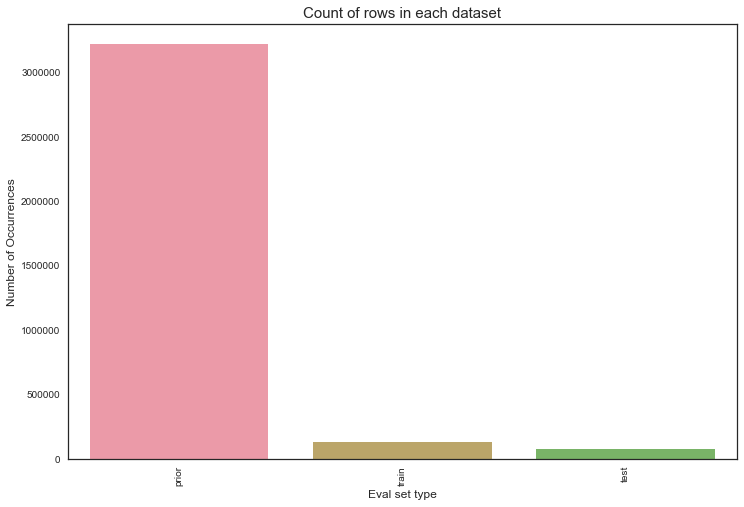

In [40]:
color = sns.color_palette()
sns.set(style="white")
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')

 
plt.show()

Fig. 1:(above): First all orders are classsified as prior orders  and last order. the last order is further divided into training set and test set. So prior order provides the history of a users ordering habit. The model for prediction will need evaluation based on training set. And the final prediction model will be evaluated for accuracy on the test set.

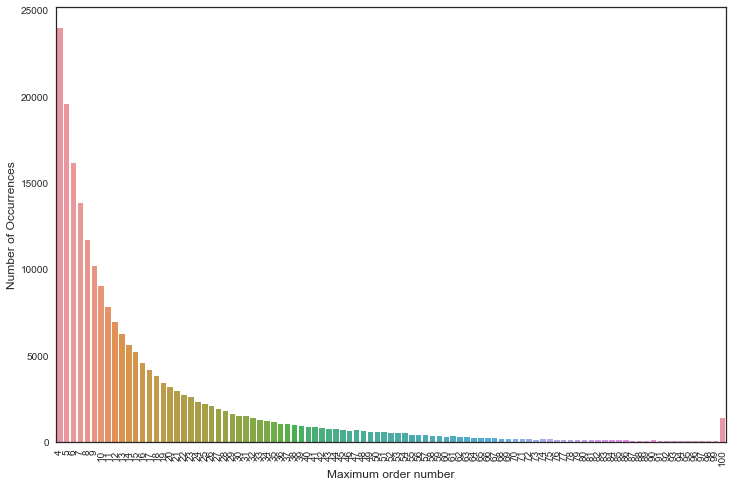

In [43]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.barplot(cnt_srs.index, cnt_srs.values, alpha=1.0)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Fig. 2: (above)Each observation in orders_df data frame has order_number field. The order_number represents the order in which a user ordered products. The maximum  of the order number per customer represents the customers ordering habits - how mny products are ordered at the most by a user. We see 23,986 orders had a max of 4 products on one end and about 47 orders had 99 items in them

In [45]:
cnt_srs.head(3)

4    23986
5    19590
6    16165
Name: order_number, dtype: int64

About 24,000 orders were 4 in number


In [48]:
cnt_srs.tail()

94    57
91    56
97    54
98    50
99    47
Name: order_number, dtype: int64

### Hourly Order Arrival rate

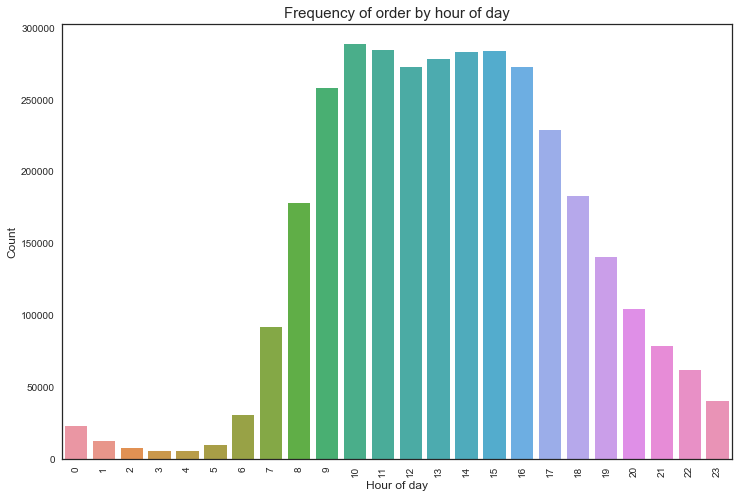

In [52]:
plt.figure(figsize=(12,8))
with sns.color_palette("BuPu"):
    sns.countplot(x="order_hour_of_day", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()


Fig. 3: (above) Peak ordering  hours are from 9 a.m. to 5 pm

### Day of the Week Arrival

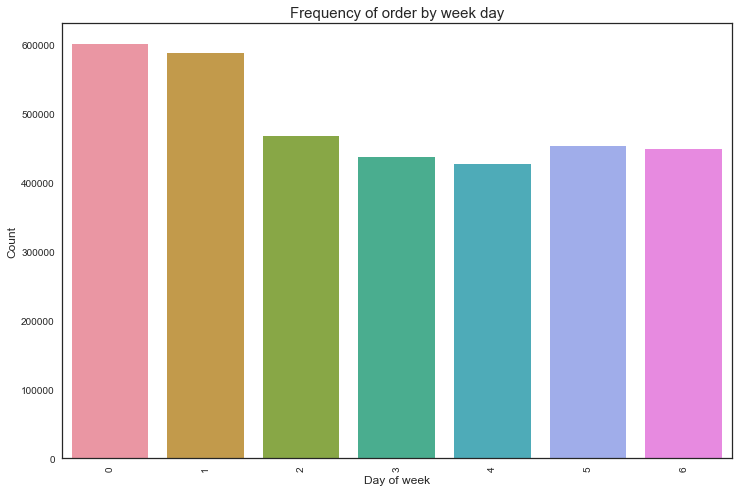

In [58]:
plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
    sns.countplot(x="order_dow", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Fig. 4: (above) : Orders arrive the most on Saturday and Sunday